<a href="https://colab.research.google.com/github/jonhsel/Data-Science/blob/master/EDA_MJSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA - ANÁLISE DOS DADOS DE CRIMINALIDADE

Neste trabalho realizo um EDA (Exploratory Data Analisys) com os dados fornecidos pelo Ministério da Justiça e Segurança Pública.

## Importação dos dados

In [0]:
#fonte de dados
DATA_PATH = "https://raw.githubusercontent.com/jonhsel/Data-Science/master/dataset/indicadoressegurancapublicaufjan20.csv"

#importação de pacotes necessários
import pandas as pd
import numpy as np


#importação do dataset
df_mjsp = pd.read_csv(DATA_PATH,  encoding='utf-8') 

#visão do dataset
df_mjsp.head()

,UF,Tipo Crime,Ano,Mês,Vítimas
0,Acre,Homicídio doloso,2015,janeiro,13
1,Acre,Homicídio doloso,2015,fevereiro,10
2,Acre,Homicídio doloso,2015,março,16
3,Acre,Homicídio doloso,2015,abril,22
4,Acre,Homicídio doloso,2015,maio,15


## Análise do dataset

Analisar como os dados estão inseridos no dataset. Verificando os tipos de dados.

In [0]:
#verificar os elementos do dataset
df_mjsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4532 entries, 0 to 4531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UF          4532 non-null   object
 1   Tipo Crime  4532 non-null   object
 2   Ano         4532 non-null   int64 
 3   Mês         4532 non-null   object
 4   Vítimas     4532 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 177.2+ KB


In [0]:
df_mjsp.shape

(4532, 5)

Verifica-se que existem:
*   05 colunas;
*   4532 entradas;
*   Não existem valores nulos;
*   O Ano não está em `datetime`.




###Alteração de tipos de dados necessários

Devemos logo transformar o tipo da coluna `data` para datetime.

In [0]:
#transformando em datetime
df_mjsp.Ano = pd.to_datetime(df_mjsp.Ano, format='%Y')
df_mjsp.info()
df_mjsp.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4532 entries, 0 to 4531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   UF          4532 non-null   object        
 1   Tipo Crime  4532 non-null   object        
 2   Ano         4532 non-null   datetime64[ns]
 3   Mês         4532 non-null   object        
 4   Vítimas     4532 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 177.2+ KB


,UF,Tipo Crime,Ano,Mês,Vítimas
0,Acre,Homicídio doloso,2015-01-01,janeiro,13
1,Acre,Homicídio doloso,2015-01-01,fevereiro,10
2,Acre,Homicídio doloso,2015-01-01,março,16
3,Acre,Homicídio doloso,2015-01-01,abril,22
4,Acre,Homicídio doloso,2015-01-01,maio,15
5,Acre,Homicídio doloso,2015-01-01,junho,14
6,Acre,Homicídio doloso,2015-01-01,julho,14
7,Acre,Homicídio doloso,2015-01-01,agosto,13
8,Acre,Homicídio doloso,2015-01-01,setembro,18
9,Acre,Homicídio doloso,2015-01-01,outubro,15


O dataset agora está com os tipos de dados dequados.

## Verificação de valores únicos

Podemos explorar as entradas de  dados da coluna `Tipo Crime`.

In [0]:
df_mjsp['Tipo Crime'].unique()

array(['Homicídio doloso', 'Lesão corporal seguida de morte',
       'Roubo seguido de morte (latrocínio)'], dtype=object)

Verificamos que existem 03 entradas.

### Quantitativo de entradas

In [0]:
df_mjsp['Tipo Crime'].value_counts()

Homicídio doloso                       1623
Roubo seguido de morte (latrocínio)    1524
Lesão corporal seguida de morte        1385
Name: Tipo Crime, dtype: int64

### Percentual de cada entrada

In [0]:
df_mjsp['Tipo Crime'].value_counts() / df_mjsp.shape[0] * 100

Homicídio doloso                       35.812004
Roubo seguido de morte (latrocínio)    33.627538
Lesão corporal seguida de morte        30.560459
Name: Tipo Crime, dtype: float64

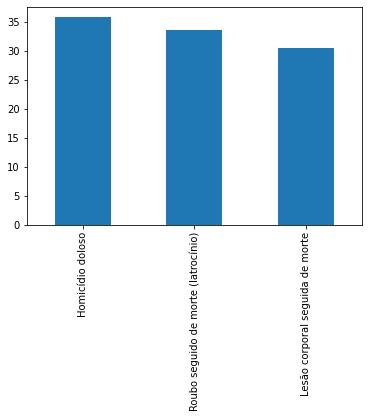

In [0]:
grafico = df_mjsp['Tipo Crime'].value_counts() / df_mjsp.shape[0] * 100
grafico.plot(kind='bar', label=True)

## Filtro de valores


### Selecionar entradas de uma coluna

Vamos selecionar apenas homicídios dosolos.

In [0]:
#retornar casos de homicídios dolosos
df_mjsp['Tipo Crime'] == 'Homicídio doloso'

0        True
1        True
2        True
3        True
4        True
        ...  
4527    False
4528    False
4529    False
4530    False
4531    False
Name: Tipo Crime, Length: 4532, dtype: bool

In [0]:
#Retornar tabela apenas como Homicídio doloso
#pega-se a condição feita acima e passa como parametro do DF
df_mjsp[df_mjsp['Tipo Crime'] == 'Homicídio doloso']

,UF,Tipo Crime,Ano,Mês,Vítimas
0,Acre,Homicídio doloso,2015-01-01,janeiro,13
1,Acre,Homicídio doloso,2015-01-01,fevereiro,10
2,Acre,Homicídio doloso,2015-01-01,março,16
3,Acre,Homicídio doloso,2015-01-01,abril,22
4,Acre,Homicídio doloso,2015-01-01,maio,15
...,...,...,...,...,...
4457,Tocantins,Homicídio doloso,2019-01-01,setembro,29
4458,Tocantins,Homicídio doloso,2019-01-01,outubro,22
4459,Tocantins,Homicídio doloso,2019-01-01,novembro,33
4460,Tocantins,Homicídio doloso,2019-01-01,dezembro,39


###LOC

As buscas de informações a partir de um determinado índice podem ser realizadas com o método `DF.loc[]`.

In [0]:
#Pesquisa as informações do primeiro item [0] do DF.
df_mjsp.loc[0]

UF                           Acre
Tipo Crime       Homicídio doloso
Ano           2015-01-01 00:00:00
Mês                       janeiro
Vítimas                        13
Name: 0, dtype: object

Caso necessitemos das informações de apenas algumas colunas, podemos passar uma lista com os nomes das colunas a serem retornadas, nos parâmetros

In [0]:
df_mjsp.loc[0, ['UF', 'Tipo Crime']]

UF                        Acre
Tipo Crime    Homicídio doloso
Name: 0, dtype: object

### ILOC

o `iloc` Permite realizar buscas a partir das faixas de indices.

In [0]:
#No caso abaixo, quero o retorno das 05 primeiras linhas e das colunas de índices 0, 1 e 4
df_mjsp.iloc[0:5, [0,1, 4]]

,UF,Tipo Crime,Vítimas
0,Acre,Homicídio doloso,13
1,Acre,Homicídio doloso,10
2,Acre,Homicídio doloso,16
3,Acre,Homicídio doloso,22
4,Acre,Homicídio doloso,15


In [0]:
#retornar casos de homicídios dolosos
df_mjsp['Tipo Crime'] == 'Homicídio doloso'

0        True
1        True
2        True
3        True
4        True
        ...  
4527    False
4528    False
4529    False
4530    False
4531    False
Name: Tipo Crime, Length: 4532, dtype: bool

In [0]:
#Retornar tabela apenas como Homicídio doloso
#pega-se a condição feita acima e passa como parametro do DF
df_mjsp[df_mjsp['Tipo Crime'] == 'Homicídio doloso']

,UF,Tipo Crime,Ano,Mês,Vítimas
0,Acre,Homicídio doloso,1970-01-01 00:00:00.000002015,janeiro,13
1,Acre,Homicídio doloso,1970-01-01 00:00:00.000002015,fevereiro,10
2,Acre,Homicídio doloso,1970-01-01 00:00:00.000002015,março,16
3,Acre,Homicídio doloso,1970-01-01 00:00:00.000002015,abril,22
4,Acre,Homicídio doloso,1970-01-01 00:00:00.000002015,maio,15
...,...,...,...,...,...
4457,Tocantins,Homicídio doloso,1970-01-01 00:00:00.000002019,setembro,29
4458,Tocantins,Homicídio doloso,1970-01-01 00:00:00.000002019,outubro,22
4459,Tocantins,Homicídio doloso,1970-01-01 00:00:00.000002019,novembro,33
4460,Tocantins,Homicídio doloso,1970-01-01 00:00:00.000002019,dezembro,39


In [0]:
#Contagem
df_mjsp[df_mjsp['Tipo Crime'] == "Homicídio doloso"]
df_v = df_mjsp[df_mjsp['Tipo Crime'] == "Homicídio doloso"]

In [0]:
df_uf = df_mjsp[df_mjsp.UF== 'Acre']
df_uf.Vítimas.sum()


1567

In [0]:
df_v.Vítimas.sum()

250758

##Agrupamento de dados

Podemos agrupar os valor a partir da função `groupby`

Abaixo foi realizado como agrupamento o somatório das vítimas por cada estado da federação. 

In [0]:
uf = df_mjsp.groupby(['UF'])['Vítimas'].sum()
uf.head(27)

UF
Acre                    1567
Alagoas                 7827
Amapá                   1589
Amazonas                6168
Bahia                  30698
Ceará                  19599
Distrito Federal        3072
Espírito Santo          6414
Goiás                  12049
Maranhão                9663
Mato Grosso             5383
Mato Grosso do Sul      4505
Minas Gerais           19121
Paraná                 11741
Paraíba                 6312
Pará                   18702
Pernambuco             21759
Piauí                   3277
Rio Grande do Norte     8969
Rio Grande do Sul      15148
Rio de Janeiro         25019
Rondônia                2487
Roraima                 1042
Santa Catarina          4627
Sergipe                 5677
São Paulo              11263
Tocantins               2012
Name: Vítimas, dtype: int64

Abaixo, temos o somatório das mesmas vítimas em função to tipo de crime.

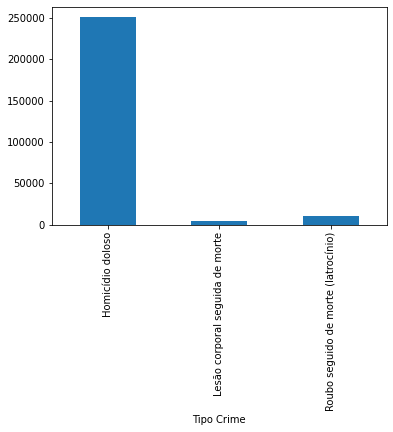

In [0]:
ano = df_mjsp.groupby('Tipo Crime')['Vítimas'].sum()
ano.plot(kind='bar')

##Conclusão

A realização da EDA é de extrema importância para o entendimento do dataset. 